Our aim is to build a model which can be used to predict  for each loan transaction, whether the customer will be paying back the loaned amount within 5 days of insurance of loan. In this case, Label ‘1’ indicates that the loan has been payed i.e. Non- defaulter, while, Label ‘0’ indicates that the loan has not been payed i.e. defaulter.  

# Importing libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import sklearn
import warnings
warnings.filterwarnings('ignore')

In [4]:
df=pd.read_csv(r"C:\Users\a\Documents\PROJECTS----\Internship\Micro Credit Project\Data file.csv")

In [5]:
df.head()

,Unnamed: 0,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
0,1,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,...,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,UPW,2016-07-20
1,2,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,...,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,UPW,2016-08-10
2,3,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,...,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,2016-08-19
3,4,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,...,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,UPW,2016-06-06
4,5,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,...,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,UPW,2016-06-22


In [6]:
df.shape


(209593, 37)

In [7]:
df.columns

Index(['Unnamed: 0', 'label', 'msisdn', 'aon', 'daily_decr30', 'daily_decr90',
       'rental30', 'rental90', 'last_rech_date_ma', 'last_rech_date_da',
       'last_rech_amt_ma', 'cnt_ma_rech30', 'fr_ma_rech30',
       'sumamnt_ma_rech30', 'medianamnt_ma_rech30', 'medianmarechprebal30',
       'cnt_ma_rech90', 'fr_ma_rech90', 'sumamnt_ma_rech90',
       'medianamnt_ma_rech90', 'medianmarechprebal90', 'cnt_da_rech30',
       'fr_da_rech30', 'cnt_da_rech90', 'fr_da_rech90', 'cnt_loans30',
       'amnt_loans30', 'maxamnt_loans30', 'medianamnt_loans30', 'cnt_loans90',
       'amnt_loans90', 'maxamnt_loans90', 'medianamnt_loans90', 'payback30',
       'payback90', 'pcircle', 'pdate'],
      dtype='object')

In [8]:
df.dtypes

Unnamed: 0                int64
label                     int64
msisdn                   object
aon                     float64
daily_decr30            float64
daily_decr90            float64
rental30                float64
rental90                float64
last_rech_date_ma       float64
last_rech_date_da       float64
last_rech_amt_ma          int64
cnt_ma_rech30             int64
fr_ma_rech30            float64
sumamnt_ma_rech30       float64
medianamnt_ma_rech30    float64
medianmarechprebal30    float64
cnt_ma_rech90             int64
fr_ma_rech90              int64
sumamnt_ma_rech90         int64
medianamnt_ma_rech90    float64
medianmarechprebal90    float64
cnt_da_rech30           float64
fr_da_rech30            float64
cnt_da_rech90             int64
fr_da_rech90              int64
cnt_loans30               int64
amnt_loans30              int64
maxamnt_loans30         float64
medianamnt_loans30      float64
cnt_loans90             float64
amnt_loans90              int64
maxamnt_

In [9]:
df.isnull().sum()

Unnamed: 0              0
label                   0
msisdn                  0
aon                     0
daily_decr30            0
daily_decr90            0
rental30                0
rental90                0
last_rech_date_ma       0
last_rech_date_da       0
last_rech_amt_ma        0
cnt_ma_rech30           0
fr_ma_rech30            0
sumamnt_ma_rech30       0
medianamnt_ma_rech30    0
medianmarechprebal30    0
cnt_ma_rech90           0
fr_ma_rech90            0
sumamnt_ma_rech90       0
medianamnt_ma_rech90    0
medianmarechprebal90    0
cnt_da_rech30           0
fr_da_rech30            0
cnt_da_rech90           0
fr_da_rech90            0
cnt_loans30             0
amnt_loans30            0
maxamnt_loans30         0
medianamnt_loans30      0
cnt_loans90             0
amnt_loans90            0
maxamnt_loans90         0
medianamnt_loans90      0
payback30               0
payback90               0
pcircle                 0
pdate                   0
dtype: int64

In [10]:
df1=df.drop(['msisdn'],axis=1)

In [11]:
df1.head(1)

,Unnamed: 0,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
0,1,0,272.0,3055.05,3065.15,220.13,260.13,2.0,0.0,1539,...,6.0,0.0,2.0,12,6,0.0,29.0,29.0,UPW,2016-07-20


In [12]:
pd.set_option('display.max_rows',None)

In [13]:
df1.head(2)

,Unnamed: 0,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
0,1,0,272.0,3055.05,3065.15,220.13,260.13,2.0,0.0,1539,...,6.0,0.0,2.0,12,6,0.0,29.0,29.0,UPW,2016-07-20
1,2,1,712.0,12122.00,12124.75,3691.26,3691.26,20.0,0.0,5787,...,12.0,0.0,1.0,12,12,0.0,0.0,0.0,UPW,2016-08-10


In [14]:
from sklearn.preprocessing import LabelEncoder

In [15]:
le=LabelEncoder()
df1['pcircle']=le.fit_transform(df1['pcircle'])

In [16]:
df1['pdate']=pd.to_datetime(df1['pdate'])

In [17]:
df1['year']=df1['pdate'].dt.year

In [18]:
df1['month']=df1['pdate'].dt.month

In [19]:
df1['day']=df1['pdate'].dt.day

In [20]:
df1.head(1)

,Unnamed: 0,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,...,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate,year,month,day
0,1,0,272.0,3055.05,3065.15,220.13,260.13,2.0,0.0,1539,...,12,6,0.0,29.0,29.0,0,2016-07-20,2016,7,20


In [21]:
df1.drop(['pdate','Unnamed: 0','year','pcircle'],axis=1,inplace=True)
df1.head()

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,month,day
0,0,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,1539,2,...,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,7,20
1,1,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,5787,1,...,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,8,10
2,1,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,1539,1,...,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,8,19
3,1,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,947,0,...,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,6,6
4,1,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,2309,7,...,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,6,22


In [22]:
df1['label'].value_counts()

1    183431
0     26162
Name: label, dtype: int64

<AxesSubplot:xlabel='label', ylabel='count'>

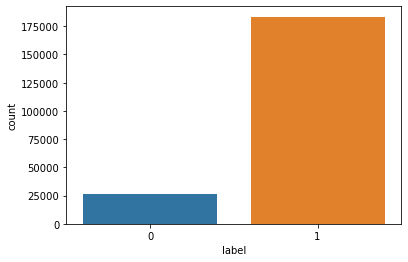

In [23]:
sb.countplot(df1['label'])

The dataset was found to be imbalanced

In [24]:
df1.describe()

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,month,day
count,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,...,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.00000
mean,0.875177,8112.343445,5381.402289,6082.515068,2692.581910,3483.406534,3755.847800,3712.202921,2064.452797,3.978057,...,274.658747,0.054029,18.520919,23.645398,6.703134,0.046077,3.398826,4.321485,6.797321,14.39894
std,0.330519,75696.082531,9220.623400,10918.812767,4308.586781,5770.461279,53905.892230,53374.833430,2370.786034,4.256090,...,4245.264648,0.218039,224.797423,26.469861,2.103864,0.200692,8.813729,10.308108,0.741435,8.43890
min,0.000000,-48.000000,-93.012667,-93.012667,-23737.140000,-24720.580000,-29.000000,-29.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,1.00000
25%,1.000000,246.000000,42.440000,42.692000,280.420000,300.260000,1.000000,0.000000,770.000000,1.000000,...,6.000000,0.000000,1.000000,6.000000,6.000000,0.000000,0.000000,0.000000,6.000000,7.00000
50%,1.000000,527.000000,1469.175667,1500.000000,1083.570000,1334.000000,3.000000,0.000000,1539.000000,3.000000,...,6.000000,0.000000,2.000000,12.000000,6.000000,0.000000,0.000000,1.666667,7.000000,14.00000
75%,1.000000,982.000000,7244.000000,7802.790000,3356.940000,4201.790000,7.000000,0.000000,2309.000000,5.000000,...,6.000000,0.000000,5.000000,30.000000,6.000000,0.000000,3.750000,4.500000,7.000000,21.00000
max,1.000000,999860.755168,265926.000000,320630.000000,198926.110000,200148.110000,998650.377733,999171.809410,55000.000000,203.000000,...,99864.560864,3.000000,4997.517944,438.000000,12.000000,3.000000,171.500000,171.500000,8.000000,31.00000


extreme outliers are there which is inferred from difference in max and 75 percent value in most of the columns.Skewness is also there.

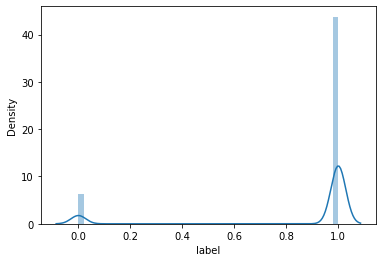

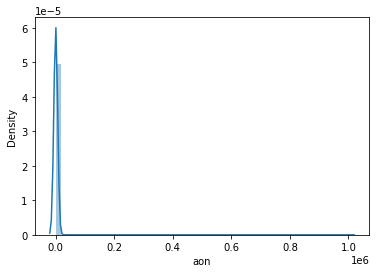

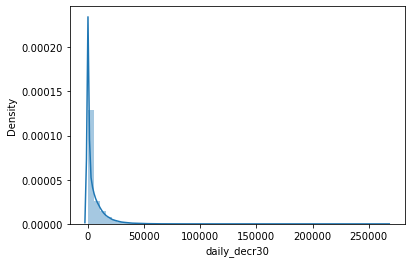

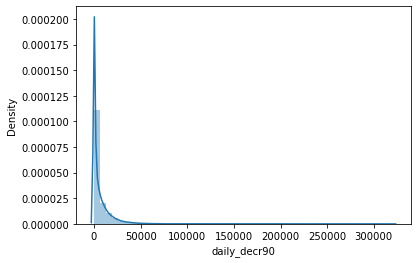

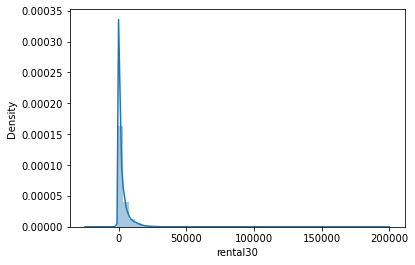

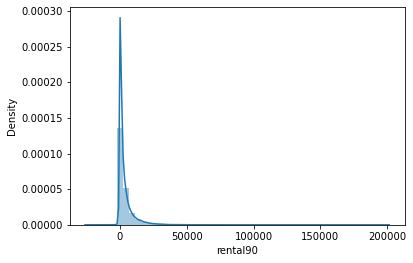

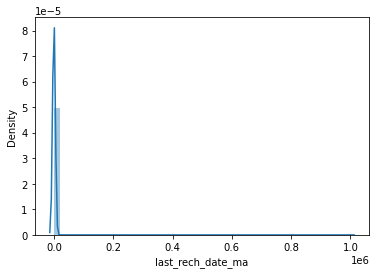

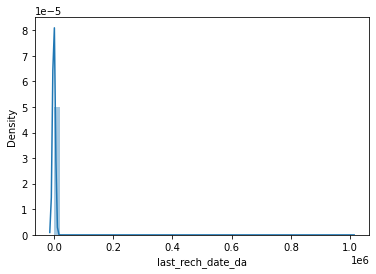

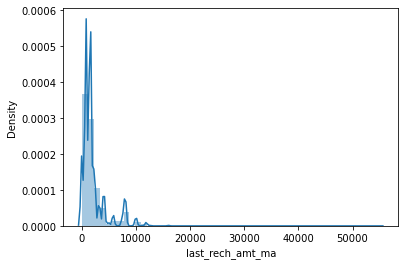

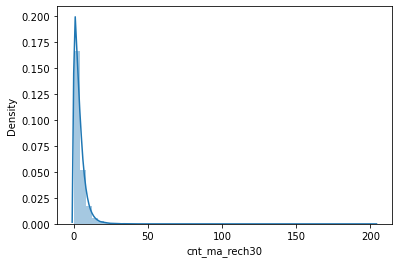

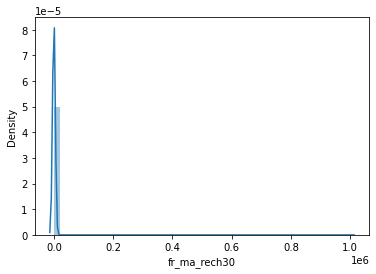

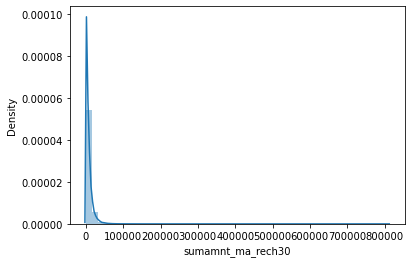

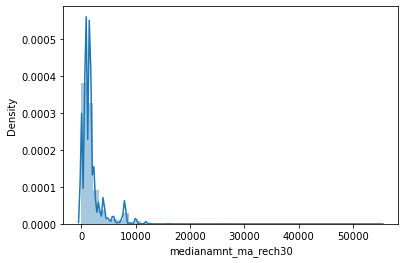

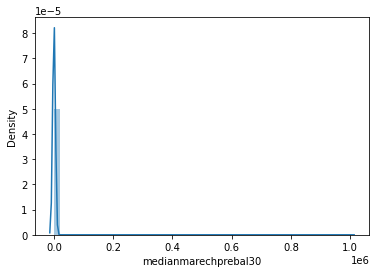

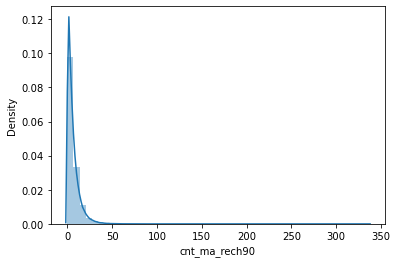

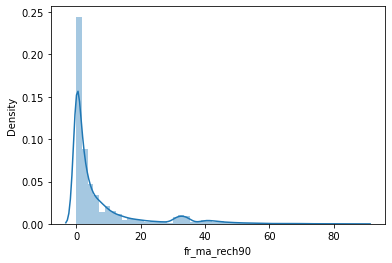

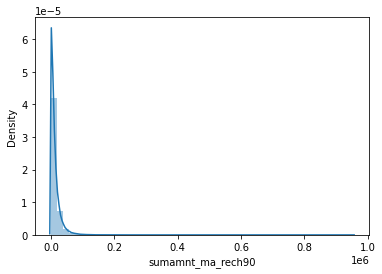

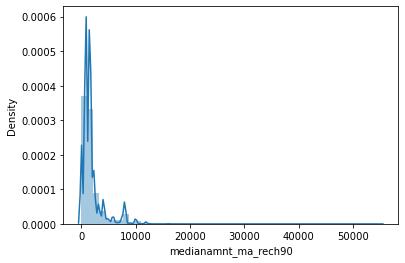

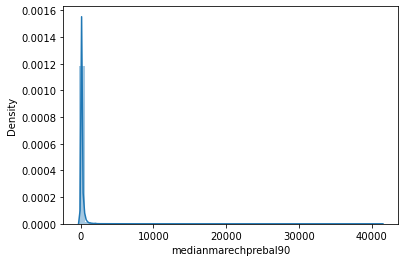

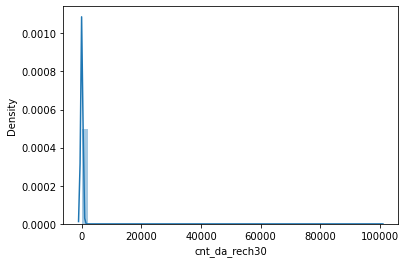

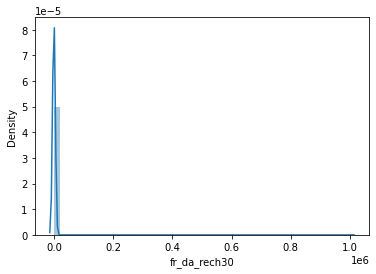

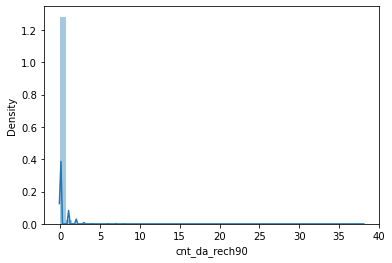

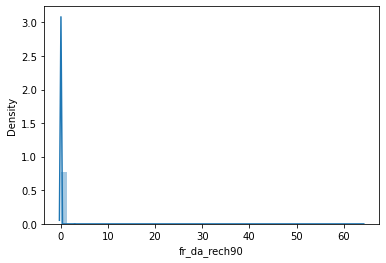

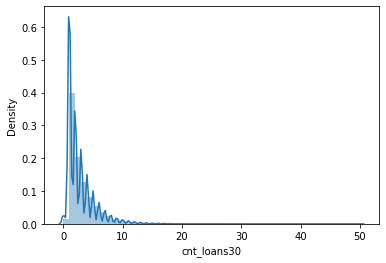

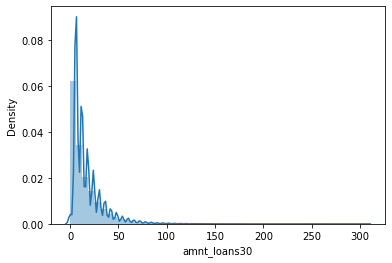

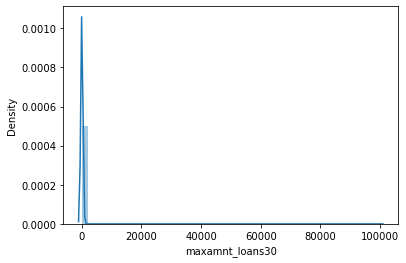

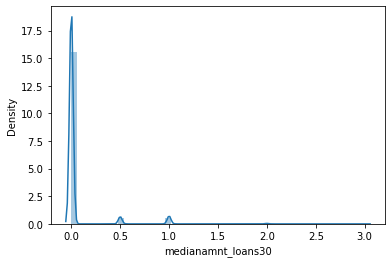

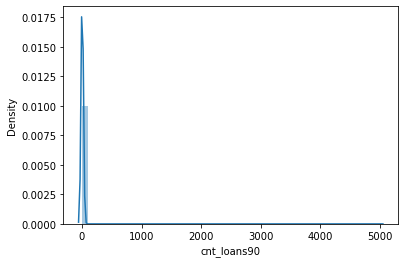

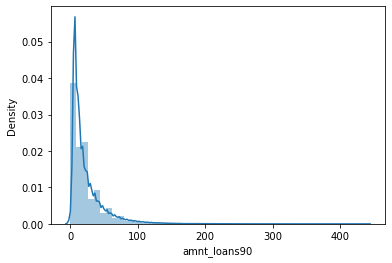

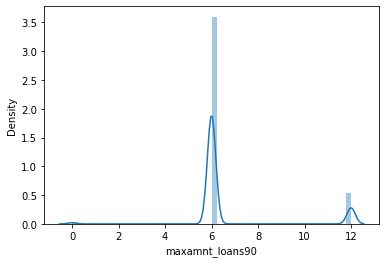

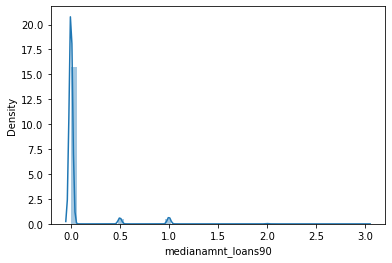

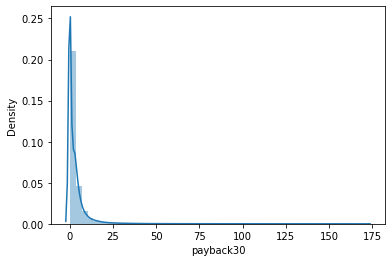

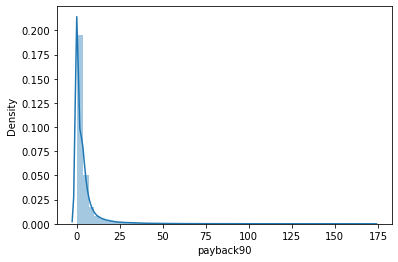

In [25]:
columns=['label','aon','daily_decr30','daily_decr90','rental30', 'rental90','last_rech_date_ma','last_rech_date_da','last_rech_amt_ma', 'cnt_ma_rech30', 'fr_ma_rech30',
'sumamnt_ma_rech30','medianamnt_ma_rech30','medianmarechprebal30','cnt_ma_rech90','fr_ma_rech90','sumamnt_ma_rech90','medianamnt_ma_rech90', 'medianmarechprebal90', 'cnt_da_rech30',
'fr_da_rech30','cnt_da_rech90','fr_da_rech90','cnt_loans30','amnt_loans30','maxamnt_loans30','medianamnt_loans30','cnt_loans90',
'amnt_loans90', 'maxamnt_loans90', 'medianamnt_loans90', 'payback30','payback90']
for i in df[columns]:
    plt.figure()
    sb.distplot(df[i])

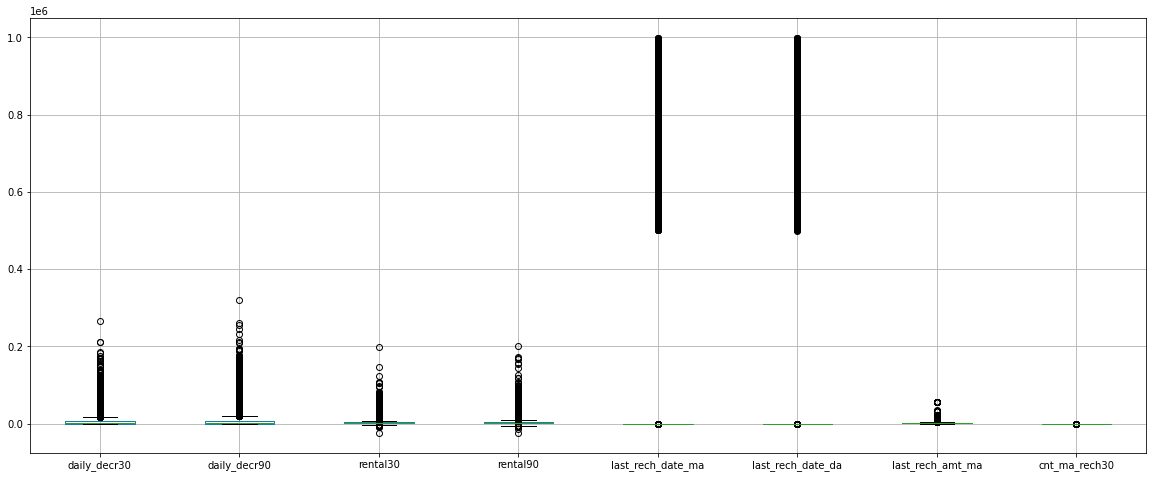

In [26]:
df1.iloc[:,2:10].boxplot(figsize=[20,8])
plt.show()

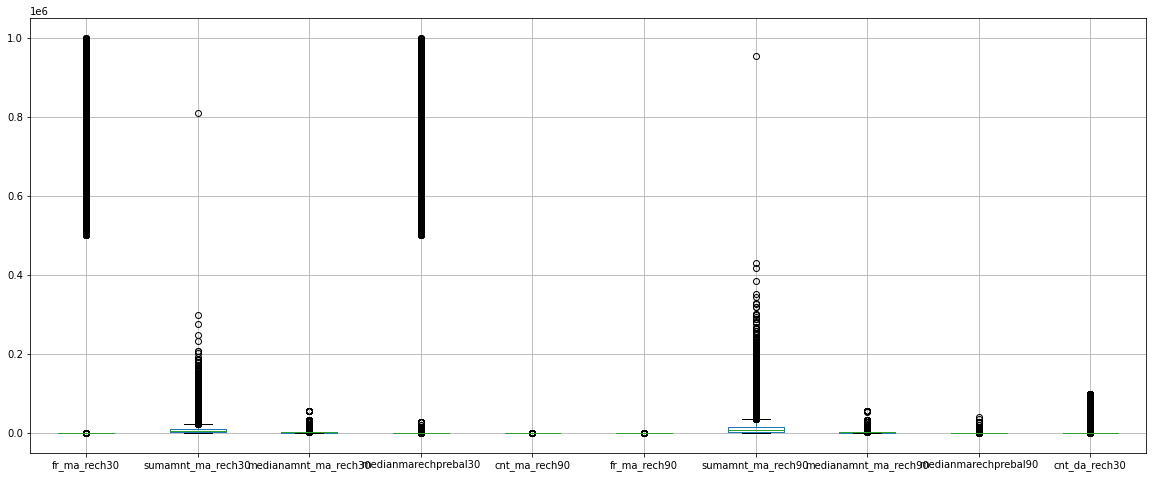

In [27]:
df1.iloc[:,10:20].boxplot(figsize=[20,8])
plt.show()

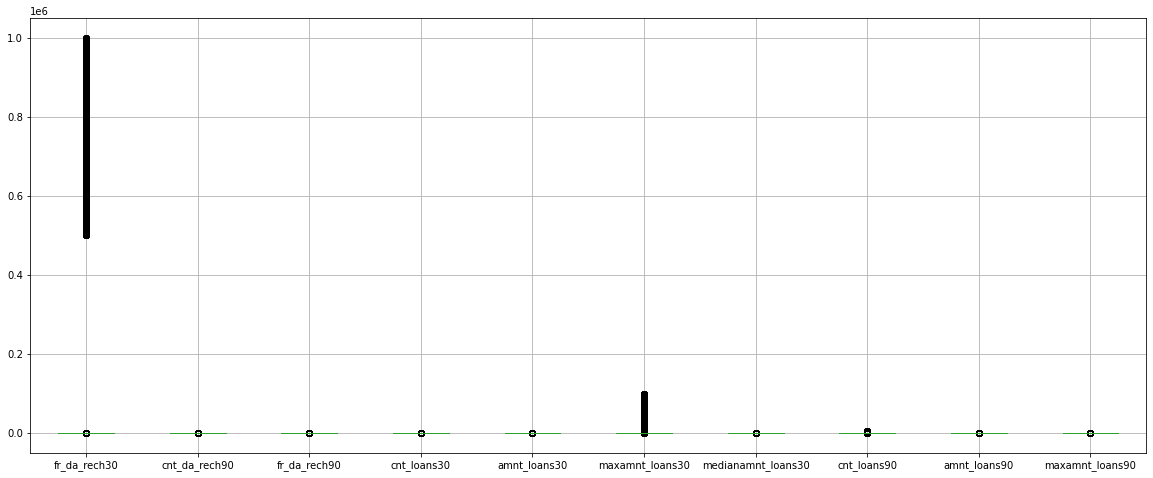

In [28]:
df1.iloc[:,20:30].boxplot(figsize=[20,8])
plt.show()

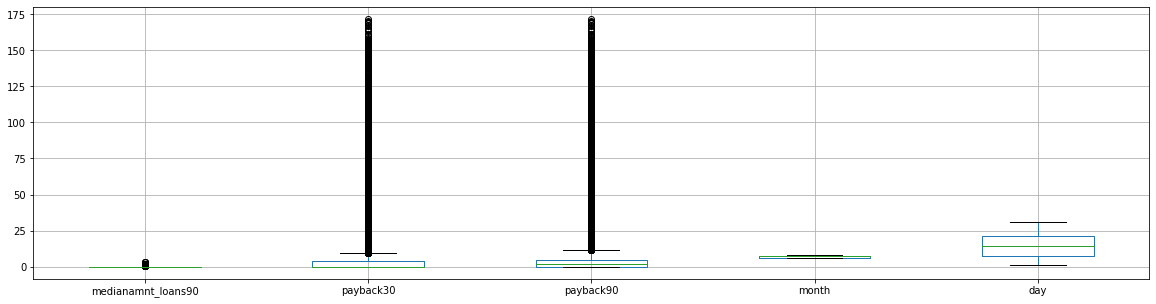

In [29]:
df1.iloc[:,30:].boxplot(figsize=[20,5])
plt.show()

In [30]:
#function for detect Outliers when feature has skewness (by IQR)

def outlier_IQR(data_frame,feature_name):
    IQR = data_frame[feature_name].quantile(0.75)-data_frame[feature_name].quantile(0.25)
    lower_bridge = data_frame[feature_name].quantile(0.25)-(IQR*1.5)
    upper_bridge = data_frame[feature_name].quantile(0.75)+(IQR*1.5)
    return (lower_bridge,upper_bridge)

In [31]:
#removing outlier from column=last_rech_date_ma
outlier_IQR(df1,'last_rech_date_ma')

(-8.0, 16.0)

In [32]:
# In 'last_rech_date_ma' samller than -8.0 and  greater than 16.0 value consider as outliers
df1.loc[df1["last_rech_date_ma"]>=16.0,"last_rech_date_ma"] = 16.0
df1.loc[df1["last_rech_date_ma"]<=-8.0,"last_rech_date_ma"] = -8.0

In [33]:
#removing outlier from column=payback90
outlier_IQR(df1,'payback90')

(-6.75, 11.25)

In [34]:

df1.loc[df1["payback90"]>=11.25,"payback90"] = 11.25
df1.loc[df1["payback90"]<=-6.75,"payback90"] = -6.75

In [35]:
#removing outlier from column=payback30
outlier_IQR(df1,'payback30')

(-5.625, 9.375)

In [36]:
df1.loc[df1["payback30"]>=9.375,"payback30"] = 9.375
df1.loc[df1["payback30"]<=-5.625,"payback30"] = -5.625

In [37]:
#removing outlier from column='daily_decr30'
outlier_IQR(df1,'daily_decr30')

(-10759.9, 18046.34)

In [38]:
df1.loc[df1['daily_decr30']>=18046.34,'daily_decr30'] =18046.34
df1.loc[df1['daily_decr30']<=-10759.9,'daily_decr30'] = -10759.9

In [39]:
#removing outlier from column='daily_decr90'
outlier_IQR(df1,'daily_decr90')

(-11597.455000000016, 19442.937000000027)

In [40]:
df1.loc[df1['daily_decr90']>=19442.93,'daily_decr90'] =19442.93
df1.loc[df1['daily_decr90']<=-11597.45,'daily_decr90'] = -11597.45

In [41]:
#removing outlier from column='rental30'
outlier_IQR(df1,'rental30')

(-4334.36, 7971.719999999999)

In [42]:
df1.loc[df1['rental30']>=7971.71,'rental30'] =7971.71
df1.loc[df1['rental30']<=-4334.36,'rental30'] = -4334.36

In [43]:
#removing outlier from column='rental90'
outlier_IQR(df1,'rental90')

(-5552.035, 10054.085)

In [44]:
df1.loc[df1['rental90']>=10054.08,'rental90'] =10054.08
df1.loc[df1['rental90']<=-5552.03,'rental90'] = -5552.03

In [45]:
#removing outlier from column='fr_ma_rech30'
outlier_IQR(df1,'fr_ma_rech30')

(-9.0, 15.0)

In [46]:
df1.loc[df1['fr_ma_rech30']>=15.0,'fr_ma_rech30'] =15.0
df1.loc[df1['fr_ma_rech30']<=-9.0,'fr_ma_rech30'] = -9.0

In [47]:

#removing outlier from column='sumamnt_ma_rech30'
outlier_IQR(df1,'sumamnt_ma_rech30')

(-11165.0, 22715.0)

In [48]:
df1.loc[df1['sumamnt_ma_rech30']>=22715.0,'sumamnt_ma_rech30'] =22715.0
df1.loc[df1['sumamnt_ma_rech30']<=-11165.0,'sumamnt_ma_rech30'] = -11165.0

In [49]:

#removing outlier from column='medianmarechprebal30'
outlier_IQR(df1,'medianmarechprebal30')

(-97.0, 191.0)

In [50]:
df1.loc[df1['medianmarechprebal30']>=191.0,'medianmarechprebal30'] =191.0
df1.loc[df1['medianmarechprebal30']<=-97.0,'medianmarechprebal30'] = -97.0

In [51]:

#removing outlier from column='sumamnt_ma_rech90'
outlier_IQR(df1,'sumamnt_ma_rech90')

(-18207.5, 36524.5)

In [52]:
df1.loc[df1['sumamnt_ma_rech90']>=36524.5,'sumamnt_ma_rech90'] =36524.5
df1.loc[df1['sumamnt_ma_rech90']<=-18207.5,'sumamnt_ma_rech90'] = -18207.5

Thus outliers were treated with IQR method

In [53]:
df1.shape

(209593, 35)

# Correlation

In [54]:
cor=df1.corr()
cor

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,month,day
label,1.000000,-0.003785,0.209546,0.212596,0.075512,0.091473,-0.051773,0.001711,0.131804,0.237331,...,0.000248,0.044589,0.004733,0.199788,0.084144,0.035747,0.162453,0.158440,0.154949,0.006825
aon,-0.003785,1.000000,-0.000183,-0.000588,-0.002316,-0.002241,-0.000228,-0.001693,0.004256,-0.003148,...,-0.002764,0.004664,-0.000611,-0.002319,-0.001191,0.002771,0.001014,0.002655,-0.001863,0.000662
daily_decr30,0.209546,-0.000183,1.000000,0.988493,0.547591,0.594924,-0.027500,-0.000779,0.265323,0.441633,...,-0.001331,-0.008562,0.010551,0.577437,0.435464,-0.041968,0.170069,0.203694,0.645831,0.011570
daily_decr90,0.212596,-0.000588,0.988493,1.000000,0.543129,0.602604,-0.020450,-0.001337,0.257792,0.425484,...,-0.001066,-0.002931,0.010562,0.576553,0.434897,-0.039717,0.167291,0.205417,0.672988,-0.008518
rental30,0.075512,-0.002316,0.547591,0.543129,1.000000,0.961501,-0.022266,0.002221,0.128559,0.305086,...,-0.001103,-0.020970,0.005538,0.365949,0.272337,-0.044657,0.166802,0.199816,0.438271,0.054005
rental90,0.091473,-0.002241,0.594924,0.602604,0.961501,1.000000,-0.004390,0.000500,0.127250,0.301036,...,-0.001460,-0.014339,0.006031,0.397437,0.296263,-0.043991,0.167338,0.215810,0.518465,0.030473
last_rech_date_ma,-0.051773,-0.000228,-0.027500,-0.020450,-0.022266,-0.004390,1.000000,-0.001562,0.280412,-0.240579,...,-0.002357,0.031024,-0.004057,-0.171439,-0.023221,0.025169,-0.170379,-0.090569,0.074874,0.037225
last_rech_date_da,0.001711,-0.001693,-0.000779,-0.001337,0.002221,0.000500,-0.001562,1.000000,-0.000149,0.001549,...,0.000503,0.000061,-0.000972,0.000519,0.001524,-0.002239,-0.002105,-0.001338,-0.001800,0.000631
last_rech_amt_ma,0.131804,0.004256,0.265323,0.257792,0.128559,0.127250,0.280412,-0.000149,1.000000,-0.002662,...,0.001000,0.028370,0.000093,0.014067,0.148460,0.021004,-0.048978,-0.022192,0.096919,0.028883
cnt_ma_rech30,0.237331,-0.003148,0.441633,0.425484,0.305086,0.301036,-0.240579,0.001549,-0.002662,1.000000,...,0.000109,-0.067011,0.014703,0.685257,0.174104,-0.071451,0.192691,0.135417,0.156148,0.068643


<function matplotlib.pyplot.show(close=None, block=None)>

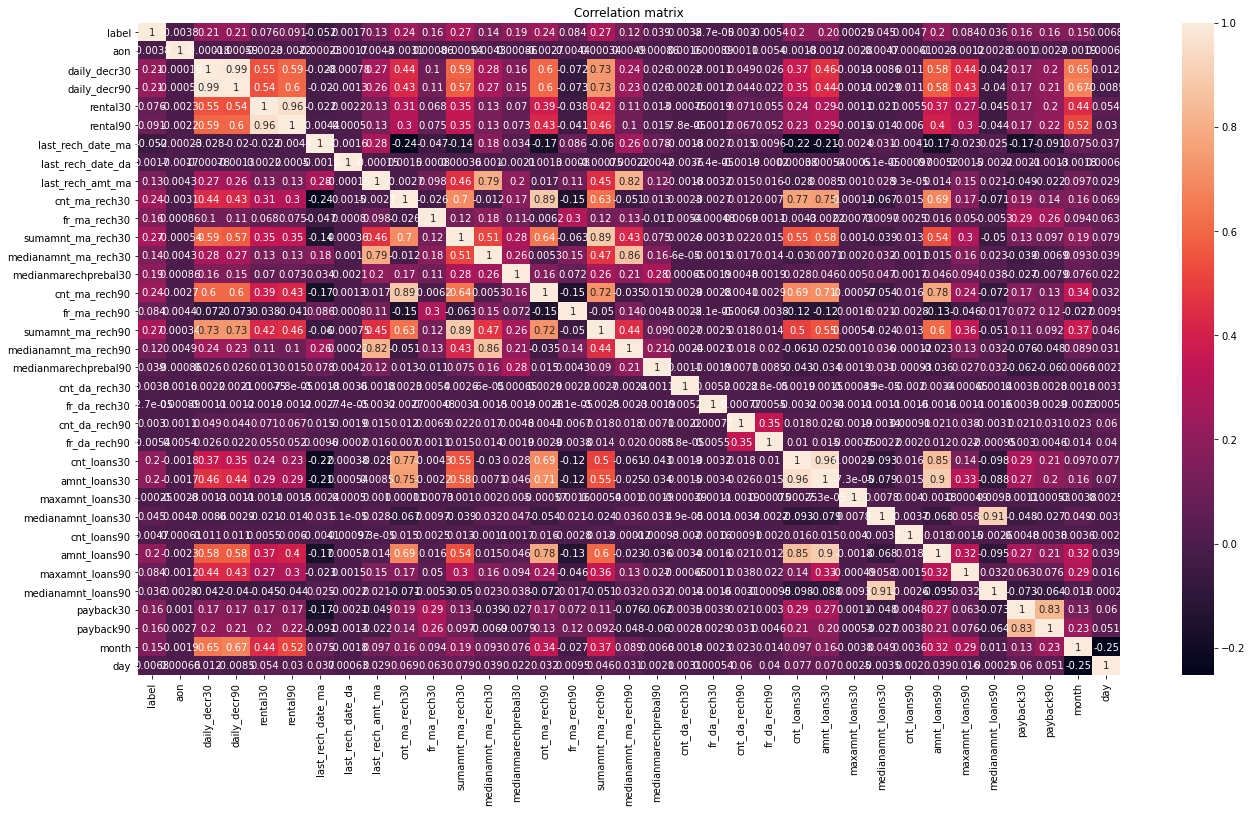

In [55]:
plt.figure(figsize=[22,12])
sb.heatmap(cor, annot=True)
plt.title('Correlation matrix')
plt.show

In [56]:
cor['label'].sort_values(ascending=False)

label                   1.000000
sumamnt_ma_rech90       0.272129
sumamnt_ma_rech30       0.268710
cnt_ma_rech30           0.237331
cnt_ma_rech90           0.236392
daily_decr90            0.212596
daily_decr30            0.209546
amnt_loans90            0.199788
amnt_loans30            0.197272
cnt_loans30             0.196283
medianmarechprebal30    0.186195
payback30               0.162453
payback90               0.158440
fr_ma_rech30            0.157933
month                   0.154949
medianamnt_ma_rech30    0.141490
last_rech_amt_ma        0.131804
medianamnt_ma_rech90    0.120855
rental90                0.091473
fr_ma_rech90            0.084385
maxamnt_loans90         0.084144
rental30                0.075512
medianamnt_loans30      0.044589
medianmarechprebal90    0.039300
medianamnt_loans90      0.035747
day                     0.006825
cnt_loans90             0.004733
cnt_da_rech30           0.003827
cnt_da_rech90           0.002999
last_rech_date_da       0.001711
maxamnt_lo

# splittingof data


In [57]:
df1.head(2)

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,month,day
0,0,272.0,3055.05,3065.15,220.13,260.13,2.0,0.0,1539,2,...,6.0,0.0,2.0,12,6,0.0,9.375,11.25,7,20
1,1,712.0,12122.00,12124.75,3691.26,3691.26,16.0,0.0,5787,1,...,12.0,0.0,1.0,12,12,0.0,0.000,0.00,8,10


In [58]:
x=df1.iloc[:,1:]
y=df1.iloc[:,0]

In [59]:
x.shape

(209593, 34)

In [60]:
y.shape

(209593,)

# Treating Skewness

In [61]:
x.skew()

aon                     10.392949
daily_decr30             1.239231
daily_decr90             1.238994
rental30                 1.192508
rental90                 1.193291
last_rech_date_ma        1.040301
last_rech_date_da       14.814857
last_rech_amt_ma         3.781149
cnt_ma_rech30            3.283842
fr_ma_rech30             1.253282
sumamnt_ma_rech30        1.080771
medianamnt_ma_rech30     3.512324
medianmarechprebal30     0.988628
cnt_ma_rech90            3.425254
fr_ma_rech90             2.285423
sumamnt_ma_rech90        1.126421
medianamnt_ma_rech90     3.752706
medianmarechprebal90    44.880503
cnt_da_rech30           17.818364
fr_da_rech30            14.776430
cnt_da_rech90           27.267278
fr_da_rech90            28.988083
cnt_loans30              2.713421
amnt_loans30             2.975719
maxamnt_loans30         17.658052
medianamnt_loans30       4.551043
cnt_loans90             16.594408
amnt_loans90             3.150006
maxamnt_loans90          1.678304
medianamnt_loa

In [62]:
from sklearn.preprocessing import power_transform

In [63]:
df_new=power_transform(x)

In [64]:
df_new=pd.DataFrame(df_new,columns=x.columns)

In [65]:
df_new.skew()

aon                       1.654517
daily_decr30             -5.145302
daily_decr90             -5.361847
rental30                  0.133157
rental90                  0.083529
last_rech_date_ma        -0.125348
last_rech_date_da      -106.606655
last_rech_amt_ma         -0.061262
cnt_ma_rech30            -0.000145
fr_ma_rech30              0.118452
sumamnt_ma_rech30        -0.452785
medianamnt_ma_rech30     -0.189628
medianmarechprebal30      0.054210
cnt_ma_rech90            -0.002465
fr_ma_rech90              0.142952
sumamnt_ma_rech90        -0.356097
medianamnt_ma_rech90     -0.044604
medianmarechprebal90      7.506286
cnt_da_rech30             6.925820
fr_da_rech30             11.390665
cnt_da_rech90             6.006577
fr_da_rech90             15.469700
cnt_loans30               0.036243
amnt_loans30              0.001948
maxamnt_loans30          -1.680107
medianamnt_loans30        3.447735
cnt_loans90               0.105580
amnt_loans90             -0.008988
maxamnt_loans90     

# Standardisation

In [66]:
from sklearn.preprocessing import StandardScaler

In [67]:
scale=StandardScaler()
df_new1=scale.fit_transform(df_new)
df_new1=pd.DataFrame(df_new1,columns=df_new.columns)

In [68]:
x=df_new1

In [69]:
x.shape

(209593, 34)

In [70]:
y.shape

(209593,)

In [73]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score,classification_report,confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model Building

In [74]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=66)

In [79]:
lg=LogisticRegression()
lg.fit(x_train,y_train)
lg.score
predlg=lg.predict(x_test)
print(f1_score(y_test,predlg))
print(confusion_matrix(y_test,predlg))
print(classification_report(y_test,predlg))
print('\n')

0.9388102860683673
[[ 1225  6490]
 [  620 54543]]
              precision    recall  f1-score   support

           0       0.66      0.16      0.26      7715
           1       0.89      0.99      0.94     55163

    accuracy                           0.89     62878
   macro avg       0.78      0.57      0.60     62878
weighted avg       0.87      0.89      0.86     62878





In [78]:
dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)
dtc.score
preddtc=dtc.predict(x_test)
print(f1_score(y_test,preddtc))
print(confusion_matrix(y_test,preddtc))
print(classification_report(y_test,preddtc))
print('\n')

0.9342703371031674
[[ 4265  3450]
 [ 3780 51383]]
              precision    recall  f1-score   support

           0       0.53      0.55      0.54      7715
           1       0.94      0.93      0.93     55163

    accuracy                           0.89     62878
   macro avg       0.73      0.74      0.74     62878
weighted avg       0.89      0.89      0.89     62878





In [80]:
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)
rfc.score
predrfc=rfc.predict(x_test)
print(f1_score(y_test,predrfc))
print(confusion_matrix(y_test,predrfc))
print(classification_report(y_test,predrfc))
print('\n')

0.956724856442608
[[ 3922  3793]
 [ 1098 54065]]
              precision    recall  f1-score   support

           0       0.78      0.51      0.62      7715
           1       0.93      0.98      0.96     55163

    accuracy                           0.92     62878
   macro avg       0.86      0.74      0.79     62878
weighted avg       0.92      0.92      0.91     62878





In [81]:
from sklearn.model_selection import cross_val_score

In [82]:
print (cross_val_score(lg,x,y,cv=5).mean())

0.8837365678942859


In [83]:
print (cross_val_score(dtc,x,y,cv=5).mean())

0.883612532791979


In [84]:
print (cross_val_score(rfc,x,y,cv=5).mean())

0.9208370574236888


Thus random forest classifier was chosen as the best model.

# saving the model

In [85]:
import joblib

In [86]:
filename='finalmicrocreditmodel.pkl'

In [87]:
joblib.dump(rfc,'finalmicrocreditmodel.pkl')

['finalmicrocreditmodel.pkl']